<a href="https://colab.research.google.com/github/SilvanaCamboim/Desenvolvimento2023/blob/main/ICC2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-30022ee11026>:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  figure = pyplot.plot(x_line2, y_line, 'green', color='red')
<ipython-input-1-30022ee11026>:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  figure = pyplot.plot(x_line2, y_line, 'green', color='red')
<ipython-input-1-30022ee11026>:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  figure = pyplot.plot(x_line2, y_line, 'green', color='red')
<ipython-input-1-30022ee11026>:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gree

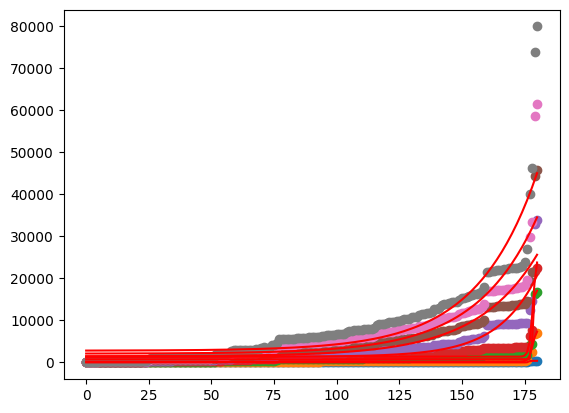

In [ ]:
## -*- coding: utf-8 -*-
"""
Created on Wed Jul 20 13:35:10 2022
@author: elias
"""

# Importanto as bibliotecas

from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd
import numpy as np
import requests
import warnings


# Definição da função
def objective(X_3, a, b, c, d):
	return a + (( b - a ) / ( 1 + np.exp (( c - X_3 ) / d )))


# Obtenção dos dados no OSM utilizando a API do OHSOME

OHSOME_API = "https://api.ohsome.org/v1"
metadata = requests.get(OHSOME_API+"/metadata").json()
TIME_MONTHLY = "2008-01-01/2023-01-01/P1M"

#lista das coordenadas

BBOX = {'1':'-38.52776,-3.78037,-38.51776,-3.77037',
'2':'-38.53276,-3.78537,-38.51276,-3.76537',
'3':'-38.53776,-3.79037,-38.50776,-3.76037',
'4':'-38.54276,-3.79537,-38.50276,-3.75537',
'5':'-38.54776,-3.80037,-38.49776,-3.75037',
'6':'-38.55276,-3.80537,-38.49276,-3.74537',
'7':'-38.55776,-3.81037,-38.48776,-3.74037',
'8':'-38.56276,-3.81537,-38.48276,-3.73537'
}



def elements(agg,**params):
    res = requests.get(OHSOME_API+"/elements"+agg,params)
    return res

#Aplicacao do Experimento

chaves=[]
overflows_tot=[]
diferenca = []
lista_rmse=[]

overflows_dict = {}

for chave, valor in BBOX.items():

    res = elements("/count", filter="highway=* or building=*", values=None, bboxes=BBOX[chave], time=TIME_MONTHLY)


    body = res.json()
    df = pd.DataFrame(body['result'])
    df.timestamp = pd.to_datetime(df.timestamp)
# Obtenção das curvas de crescimento
    X = df.timestamp.values.astype(float).reshape(-1, 1)
    Y = df.value.values
    #X_3=(pd.to_timedelta(df.timestamp-df.timestamp[0], unit='d').dt.days)
    numeros = []
    for i in range(len(Y)):
        numeros.append(i)
    numeros2 = np.array(numeros)
    X_3= numeros2
    Y_3=(np.array(Y))

    warnings.filterwarnings("error",category=RuntimeWarning)


    overflows = 0

    try:

        #regressão

        popt, _ = curve_fit(objective, X_3, Y_3, method="lm", maxfev=70000)
        a, b, c, d = popt

        pyplot.scatter(X_3, Y_3)

        x_line = X_3
        x_line2 = np.asarray(X_3)

        y_line = objective(x_line, a, b, c, d)
        figure = pyplot.plot(x_line2, y_line, 'green', color='red')
        figure = pyplot.gcf()
        pyplot.savefig(f"/content/drive/MyDrive/ICC2023/{chave}.png")
        pyplot.clf()
        diff = (y_line-Y_3)*(y_line-Y_3)
        tamanho = len(Y_3)
        rmse = np.sqrt(np.sum(diff)/tamanho)
        print (tamanho)
        print (chave)
        print (rmse)
        print (rmse/Y_3[tamanho-1])
        print (Y_3[tamanho-1])

    except:
        overflows += 1

    #print(type(overflows))

    overflows_tot.append(int(overflows))

    if not chave in overflows_dict:
        overflows_dict[chave] = [int(overflows)]
    else:
        overflows_dict[chave].append(int(overflows))

    #print (chave)



#Saída dos Dados

#print(overflows_tot)



#saida=pd.DataFrame(overflows_dict).transpose()

#print(saida)
#saida.to_csv("/content/drive/MyDrive/ICC2023/overflows.txt")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful